Checking for data reliability using Benford's law.

https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
!wget -N https://covid.ourworldindata.org/data/owid-covid-data.csv

--2021-06-22 08:41:16--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 2606:4700:3038::6815:e989, 2606:4700:3038::6815:e98a, 104.21.233.138, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|2606:4700:3038::6815:e989|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [           <=>      ]  24.41M  11.5MB/s    in 2.1s    

Last-modified header missing -- time-stamps turned off.
2021-06-22 08:41:18 (11.5 MB/s) - ‘owid-covid-data.csv’ saved [25591543]



In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

In [3]:
df = pd.read_csv(
    'owid-covid-data.csv',
    keep_default_na = False,
    na_values       = '',
    parse_dates     = [3],
    dayfirst        = True,
)

# show the last rows as columns in reverse order
(
    df
    .tail(5)
    .transpose()
    .iloc[:, ::-1]
)

97326  \
iso_code                                               ZWE   
continent                                           Africa   
location                                          Zimbabwe   
date                                   2021-06-21 00:00:00   
total_cases                                        42195.0   
new_cases                                            416.0   
new_cases_smoothed                                 302.571   
total_deaths                                        1685.0   
new_deaths                                            13.0   
new_deaths_smoothed                                  7.143   
total_cases_per_million                           2838.943   
new_cases_per_million                               27.989   
new_cases_smoothed_per_million                      20.357   
total_deaths_per_million                           113.369   
new_deaths_per_million                               0.875   
new_deaths_smoothed_per_million                      0.481   
reproduction_rate                                      NaN   
icu_patients                                           NaN   
icu_patients_per_million                               NaN   
hosp_patients                                          NaN   
hosp_patients_per_million                              NaN   
weekly_icu_admissions                                  NaN   
weekly_icu_admissions_per_million                      NaN   
weekly_hosp_admissions                                 NaN   
weekly_hosp_admissions_per_million                     NaN   
new_tests                                              NaN   
total_tests                                            NaN   
total_tests_per_thousand                               NaN   
new_tests_per_thousand                                 NaN   
new_tests_smoothed                                     NaN   
new_tests_smoothed_per_thousand                        NaN   
positive_rate                                          NaN   
tests_per_case                                         NaN   
tests_units                                            NaN   
total_vaccinations                                     NaN   
people_vaccinated                                      NaN   
people_fully_vaccinated                                NaN   
new_vaccinations                                       NaN   
new_vaccinations_smoothed                              NaN   
total_vaccinations_per_hundred                         NaN   
people_vaccinated_per_hundred                          NaN   
people_fully_vaccinated_per_hundred                    NaN   
new_vaccinations_smoothed_per_million                  NaN   
stringency_index                                       NaN   
population                                      14862927.0   
population_density                                  42.729   
median_age                                            19.6   
aged_65_older                                        2.822   
aged_70_older                                        1.882   
gdp_per_capita                                    1899.775   
extreme_poverty                                       21.4   
cardiovasc_death_rate                              307.846   
diabetes_prevalence                                   1.82   
female_smokers                                         1.6   
male_smokers                                          30.7   
handwashing_facilities                              36.791   
hospital_beds_per_thousand                             1.7   
life_expectancy                                      61.49   
human_development_index                              0.571   
excess_mortality                                       NaN   

                                                     97325  \
iso_code                                               ZWE   
continent                                           Africa   
location                                          Zimbabwe   
date                  

Checking Benford's law for all figures. For a continent check, change the first line to something like `df['continentExp'] == 'Europe'`. We use a `lambda` function to select the first character, count the occurrences, and calculate the relative number. Then we create a column according to Benford's law as a reference and plot both.

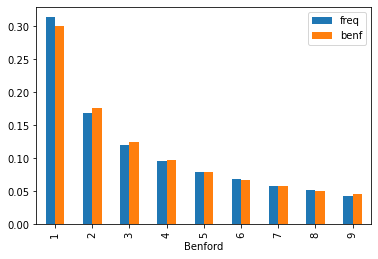

In [4]:
df['Benford'] = (
    df
    [
        (
            df
            ['new_cases']
            > 0
        )
        &
        (
            df
            ['continent']
            != ''
        )
    ]
    ['new_cases']
    .apply(
        lambda x: str(x)[0]
    )
)
df['count'] = 1
df_benf = (
    df
    [
        [
            'Benford',
            'count',
        ]
    ]
    .groupby(
        by='Benford',
    )
    .sum()
)
df_benf['freq'] = (
    (
        df_benf
        ['count']
    )
    /
    (
        df_benf
        ['count']
        .sum()
    )
)
df_benf['benf'] = np.log10(
    1 +
    1 /
    (
        df_benf
        .index
        .values
        .astype(float)
    )
)
(
    df_benf
    [
        [
            'freq',
            'benf',
        ]
    ]
    .plot(
        kind='bar',
    )
)

Kolmogorov-Smirnov is an easy way to compare two distributions by calculating the maximum difference between the cumulative values, where `0` is exact correspondence.

In [5]:
KS = (
    abs(
        (
            df_benf
            ['freq']
            .cumsum()
        )
        -
        (
            df_benf
            ['benf']
            .cumsum()
        )
    )
    .max()
)
print(
    'KS = {:1.3f}'
    .format(
        KS,
    )
)

KS = 0.013
